In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'BMJUA_ttf'

In [2]:
analysisdata = pd.read_json('../data/getseedcorpdata.json')

In [3]:
analysisdata

,successMsg,data,success
products,success,"[{'id': 'PD00012796', 'name': '위글위글', 'logoImg...",True
similarCorps,success,"[{'corpId': 'CP00017523', 'bizNameKr': '커머스,패션...",True
mau,success,"{'recentUpdate': '2024-04-24', 'list': [{'prod...",True
customerSales,success,"{'recentUpdate': '2024-04-24', 'salesBasic': [...",True
customerType,success,"{'recentUpdate': '2024-04-24', 'salesPerson': ...",True
investment,success,"{'recentUpdate': '2022-10-04', 'lastInvestment...",True
organization,success,"{'recentUpdate': '2024-04-24', 'retireRate': 3...",True
dataSufficient,success,True,True


## MAU

In [25]:
df_mau = pd.DataFrame(analysisdata['data']['mau']['list'][0]['data'])

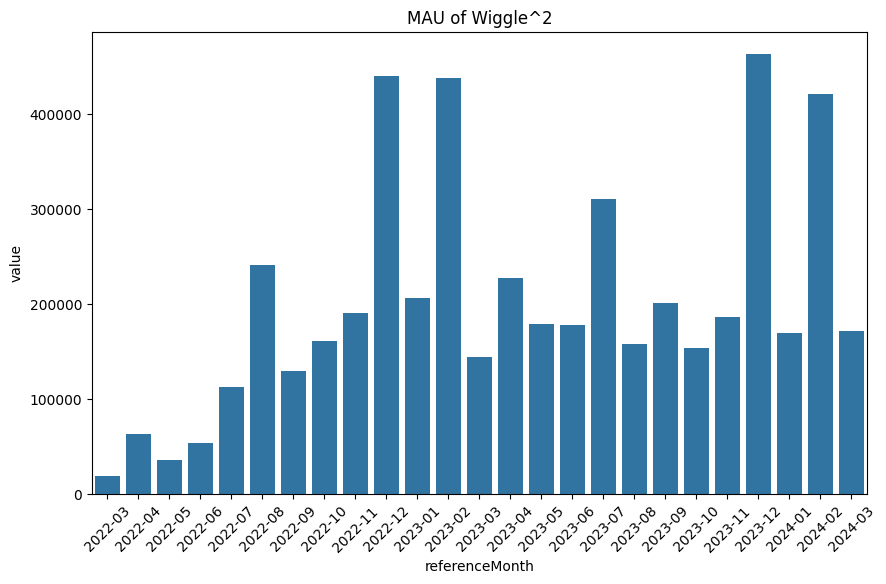

In [56]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_mau, x='referenceMonth', y='value')

plt.title('MAU of Wiggle^2')
plt.xticks(rotation=45)
plt.show()

## 판매실적

In [32]:
df_salesBasic = pd.DataFrame(analysisdata['data']['customerSales']['salesBasic'])

In [61]:
df_salesBasic['inCome'] = df_salesBasic['count']*df_salesBasic['unitPrice']

In [57]:
df_salesBasic[:5]

,referenceMonth,rate,count,unitPrice
0,2021-09,0.3,318,30934.3
1,2021-10,0.8,629,34612.2
2,2021-11,1.6,918,45875.7
3,2021-12,1.3,940,36883.1
4,2022-01,0.3,316,32367.2


### 판매 건수

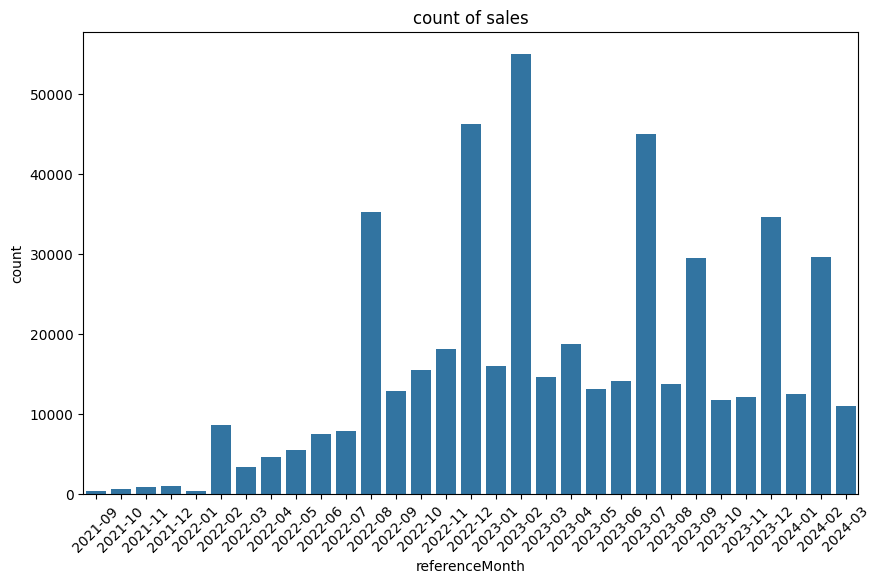

In [58]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic, x='referenceMonth', y='count')

plt.title('count of sales')
plt.xticks(rotation=45)
plt.show()

### 평균 가격

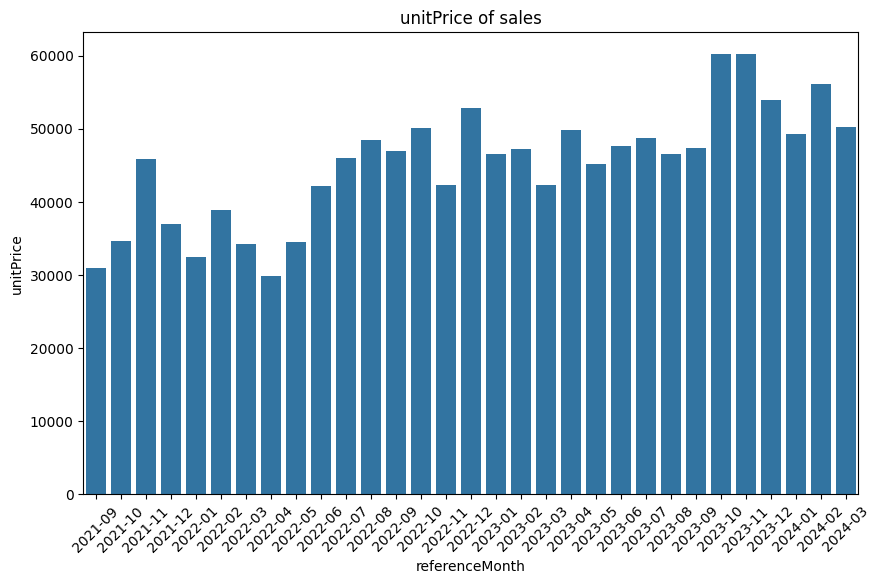

In [59]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic, x='referenceMonth', y='unitPrice')

plt.title('unitPrice of sales')
plt.xticks(rotation=45)
plt.show()

### 매출

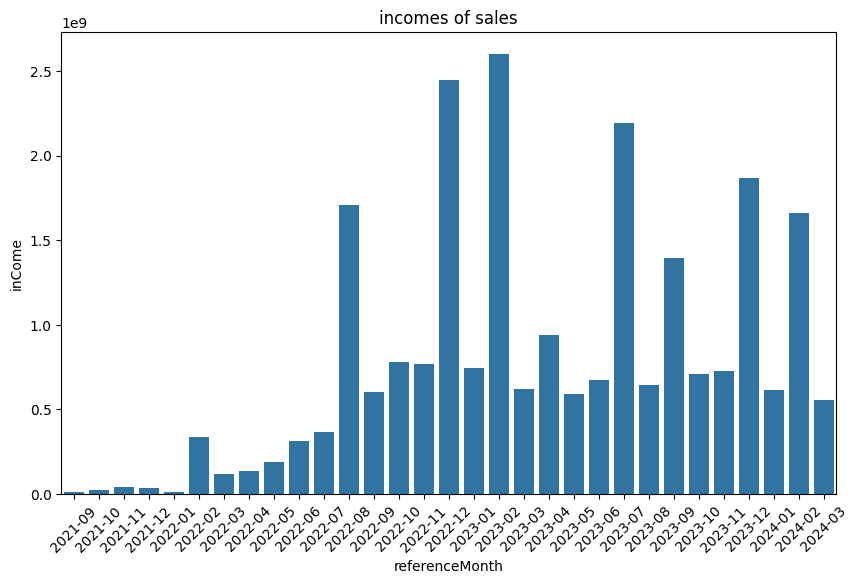

In [62]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic, x='referenceMonth', y='inCome')

plt.title('incomes of sales')
plt.xticks(rotation=45)
plt.show()

## 재구매율

In [36]:
df_salesPeriod = pd.DataFrame(analysisdata['data']['customerSales']['salesPeriod'])

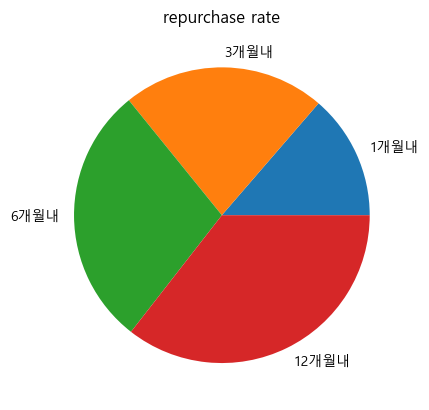

In [85]:
plt.pie(df_salesPeriod['repurchaseRate'], labels=df_salesPeriod['period'])
plt.title('repurchase rate')
plt.show()

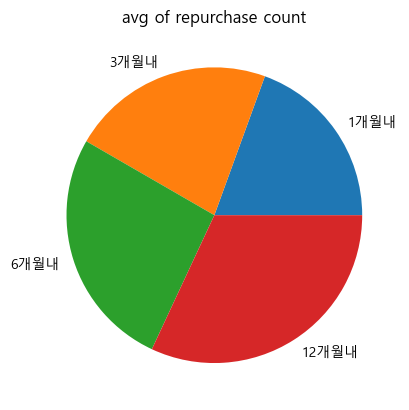

In [86]:
plt.pie(df_salesPeriod['avgPurchaseRate'], labels=df_salesPeriod['period'])
plt.title('avg of repurchase count')

plt.show()

## 소비자 유형

In [38]:
df_salesPerson = pd.DataFrame(analysisdata['data']['customerType']['salesPerson'])
df_salesFamily = pd.DataFrame(analysisdata['data']['customerType']['salesFamily'])
df_salesIncome = pd.DataFrame(analysisdata['data']['customerType']['salesIncome'])

### 성별 및 연령

<Axes: xlabel='ageGroup', ylabel='rate'>

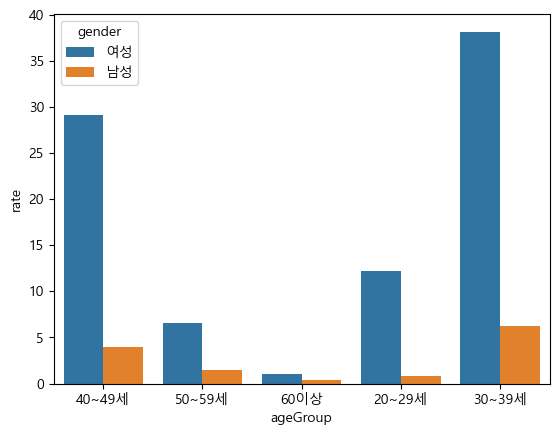

In [87]:
sns.barplot(data=df_salesPerson, x='ageGroup', y='rate', hue='gender')

### 가족구성 및 소득

In [90]:
df_salesIncome

,type,rate
0,2000만원이하,1.0
1,3000만원이하,13.6
2,4000만원이하,22.7
3,5000만원이하,22.1
4,6000만원이하,16.6
5,8000만원이하,12.9
6,1억원이하,4.8
7,1억원초과,6.3


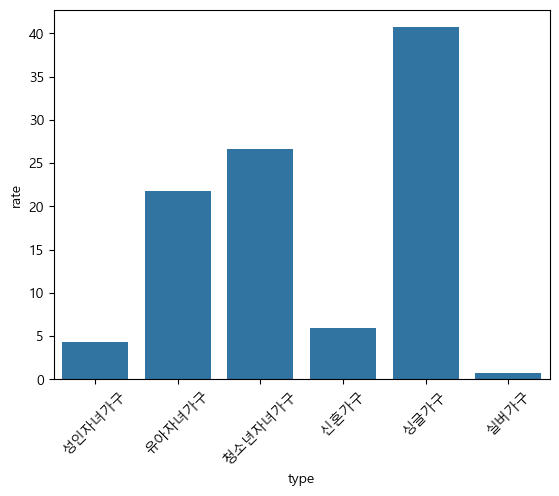

In [93]:
sns.barplot(data=df_salesFamily, x='type', y='rate')

plt.xticks(rotation=45)
plt.show()


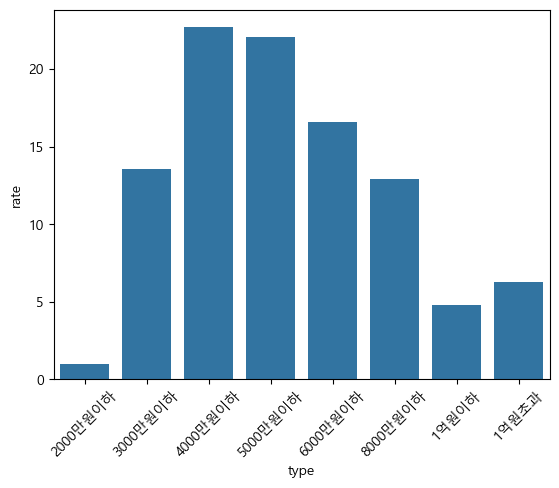

In [92]:
sns.barplot(data=df_salesIncome, x='type', y='rate')

plt.xticks(rotation=45)
plt.show()
